In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler

In [2]:
all_hot_songs = pd.read_csv('./all_top_songs.csv')
all_hot_songs.head()

,album,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Rainbow Connection,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Somewhere Over The Rainbow_What A Wonderful World,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,What a Wonderful World,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,What A Wonderful World - Single Version,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [3]:
all_hot_songs['album'] = all_hot_songs['album'].str.lower()
all_hot_songs['artist'] = all_hot_songs['artist'].str.lower()
all_hot_songs = all_hot_songs.rename(columns={'album':'title',})

In [4]:
df_names_only = all_hot_songs.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'], axis=1)
df_names_only.head()

,title,artist,uri
0,rainbow connection,the muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,somewhere over the rainbow_what a wonderful world,israel kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF
2,what a wonderful world,joey ramone,spotify:track:04cdEVbQPb8BJb7593e5fO
3,one day / reckoning song (wankelmut remix) [ra...,asaf avidan & the mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,what a wonderful world - single version,louis armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej


In [5]:
clust = all_hot_songs.drop(['title', 'artist','uri'], axis=1)
clust.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(clust)
X_prep = scaler.transform(clust)
pickle.dump(scaler, open('standard.pkl', 'wb'))

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [8]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    486
1    286
2     41
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

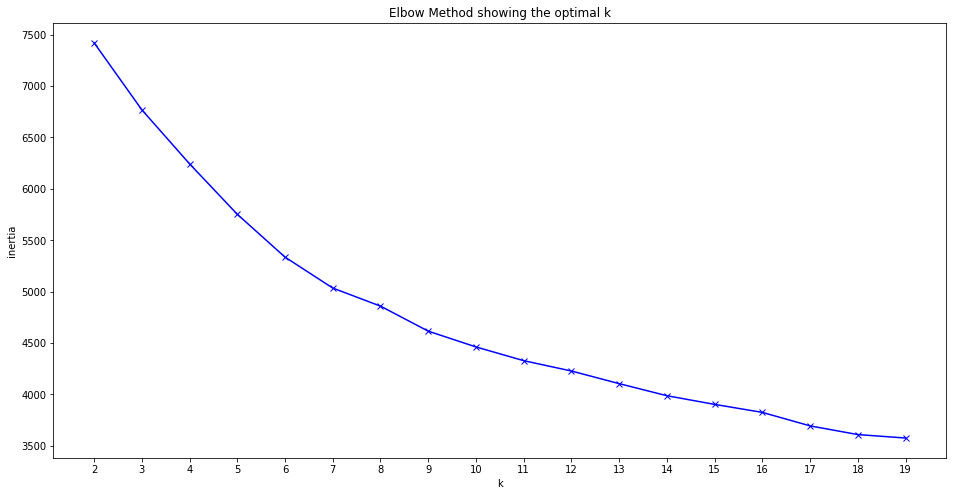

In [9]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

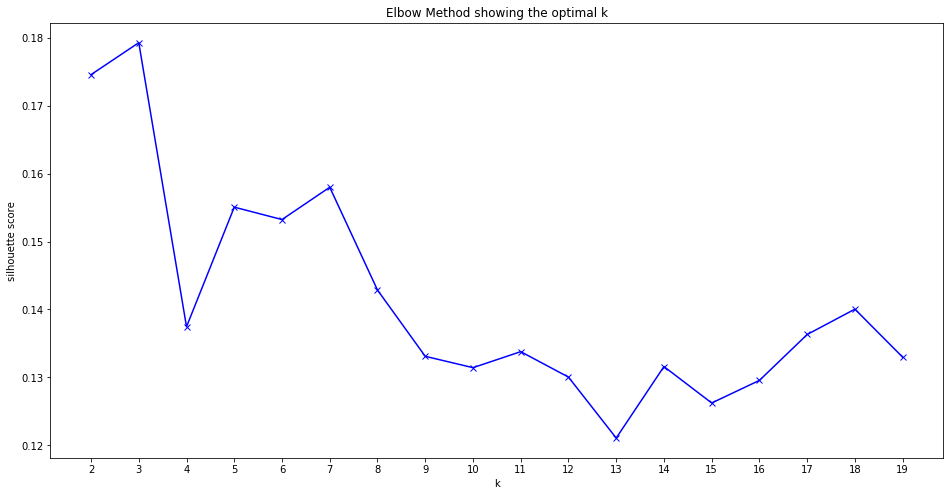

In [10]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

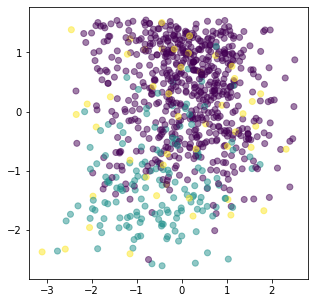

In [11]:
from sklearn import cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

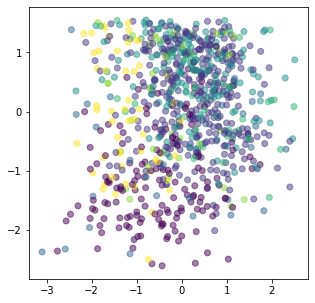

In [12]:
from sklearn import cluster
agglomerative = cluster.AgglomerativeClustering(n_clusters=7,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

In [13]:
# clusters_df = clusters_df.rename(columns={0:'cluster'})

In [14]:
cluster_df = pd.concat([clust,pd.Series(clusters)],axis=1)
cluster_df = cluster_df.rename(columns={0:'cluster'})
cluster_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,1
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,1
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,0
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,0
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,1


In [15]:
after_clustering = pd.concat([df_names_only, cluster_df],axis=1)
# after_clustering 
# after_clustering.to_csv('all_top_songs_after_clustering.csv', index=False)

In [16]:
kmeans.inertia_ 

3576.3385595146588

In [17]:
# importing top 100 songs
top_100_songs = pd.read_csv('./top_100_songs.csv')
top_100_songs['title'] = top_100_songs['title'].str.lower()
top_100_songs['artist'] = top_100_songs['artist'].str.lower()
# top_100_songs

# Creating Pipeline

In [18]:
# 1st prototype
from random import randint

def songs (data=top_100_songs):
    song =  str(input("search songs or artist you are intrested: ").lower())
    for i in range(len(top_100_songs)):
        if top_100_songs['title'][i] == song:
            rand_number = randint(0,len(top_100_songs))
            return(print("I would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number]))
        elif top_100_songs['artist'][i] == song:
            rand_number = randint(0,len(top_100_songs))
            return(print("I would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number]))
    return ("Not in the list")
songs()

search songs or artist you are intrested: jjjjj


'Not in the list'

In [19]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]
# secrets_dict

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [22]:
# # 2nd prototype
# from random import randint

# def audio_features(song, artist):
#     search = artist + ' - '+ song
#     features = sp.audio_features(sp.search(q=search, limit=1)["tracks"]["items"][0]['uri'])[0]
#     return features

# def songs (data=top_100_songs):
#     song =  str(input("search songs you are intrested: ").lower())
#     artist =  str(input("search artist you are intrested: ").lower())

#     if ((top_100_songs[(top_100_songs['title'] == song) & (top_100_songs['artist'] == artist)].count()[0] > 0)):
#         rand_number = randint(0,len(top_100_songs))
#         print("I would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number])
#     else:       
#         feature = audio_features(song,artist)
#         new_song = pd.DataFrame([feature])
#         new_song = new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
#         new_scaler = scaler.transform(new_song)
#         new_clusters = kmeans.predict(new_scaler)
#         cluster_final = after_clustering[after_clustering['cluster'] == list(new_clusters)[0]]
#         rand_number1 = randint(0,len(after_clustering))
#         print('Your recommendation:',after_clustering['title'][rand_number1], "\" by", after_clustering['artist'][rand_number1])
#     return
# songs()

search songs you are intrested: yemito
search artist you are intrested: haricharan
Your recommendation: pity party " by melanie martinez


In [35]:
# 2nd prototype 

def audio_features(song, artist):
    search = artist + ' - '+ song
    features = sp.audio_features(sp.search(q=search, limit=1)["tracks"]["items"][0]['uri'])[0]
    return features

def songs (data=top_100_songs):
    
    song =  str(input("search songs you are intrested: ").lower())
    artist =  str(input("search artist you are intrested: ").lower())
    search = sp.search(q=song, type='track')
    check = search["tracks"]["total"] 

    while check == 0:
        print("Song does not exists, try another")
        song =  str(input("search songs you are intrested: ").lower())
        artist =  str(input("search artist you are intrested: ").lower())
        search = sp.search(q=song, type='track')
        check = search["tracks"]["total"]

    if ((top_100_songs[(top_100_songs['title'] == song) & (top_100_songs['artist'] == artist)].count()[0] > 0)):
        rand_number = randint(0,len(top_100_songs))
        print("I would recommend you to listen: \"", top_100_songs['title'][rand_number], "\" by", top_100_songs['artist'][rand_number])
    else:       
        feature = audio_features(song,artist)
        new_song = pd.DataFrame([feature])
        new_song = new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
        new_scaler = scaler.transform(new_song)
        new_clusters = kmeans.predict(new_scaler)
        cluster_final = after_clustering[after_clustering['cluster'] == list(new_clusters)[0]]
        rand_number1 = randint(0,len(after_clustering))
        print("I would recommend you to listen: \"",after_clustering['title'][rand_number1], "\" by", after_clustering['artist'][rand_number1])
    return
songs()        


search songs you are intrested: ghudello
search artist you are intrested: dfghv
Song does not exists, try another
search songs you are intrested: yemito
search artist you are intrested: haricharan
I would recommend you to listen: " a girl like you " by edwyn collins
